In [1]:
import pandas as pd
import numpy as np
import scipy
import nltk
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,roc_curve,confusion_matrix
import math
import re
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
import ast
from imblearn.over_sampling import SMOTE

RANDOM_STATE=4222


2023-04-14 18:29:34.573189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brendanlim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendanlim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dftrain = pd.read_csv('datasets/train_and_test/train.csv')
dftest = pd.read_csv("Datasets/train_and_test/test.csv")

In [3]:
dftrain.head()

,Unnamed: 0,title,company_profile,description,requirements,benefits,title_tokens,company_profile_tokens,description_tokens,requirements_tokens,...,spelling_errors_title,spelling_errors_company_profile,spelling_errors_description,spelling_errors_requirements,spelling_errors_benefits,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits
0,12457,Surveyors / Order Takers,Not specified,Get paid $12 per hour to walk 3 miles per day....,Customer service skills are required. We train...,Great hourly pay as well as bonuses with no se...,"['Surveyors', '/', 'Order', 'Takers']","['Not', 'specified']","['Get', 'paid', '$', '12', 'per', 'hour', 'to'...","['Customer', 'service', 'skills', 'are', 'requ...",...,-0.365733,-0.430176,-0.454923,-0.814619,-0.435584,0.288249,-0.838066,0.193859,-0.615274,-0.424361
1,4961,Graphics Artist,Itsa Southern Thing Apparel owns several cloth...,Can you draw absolutely anything? Can you hand...,College degree strongly preferred.Degree from ...,"$32,000 salaryHealth InsuranceReitement matchi...","['Graphics', 'Artist']","['Itsa', 'Southern', 'Thing', 'Apparel', 'owns...","['Can', 'you', 'draw', 'absolutely', 'anything...","['College', 'degree', 'strongly', 'preferred.D...",...,-0.365733,0.100974,-0.560832,-0.814619,0.502864,-0.625359,0.064432,-0.724905,-0.559153,-0.332475
2,8992,Graduates: English Teacher Abroad (Conversatio...,We help teachers get safe & secure jobs abroad :),"Play with kids, get paid for itLove travel? Jo...",University degree required.TEFL / TESOL / CELT...,See job description,"['Graduates', ':', 'English', 'Teacher', 'Abro...","['We', 'help', 'teachers', 'get', 'safe', '&',...","['Play', 'with', 'kids', ',', 'get', 'paid', '...","['University', 'degree', 'required.TEFL', '/',...",...,-0.365733,-0.430176,-0.349013,-0.512111,-0.435584,2.115465,-0.657567,-0.549902,-0.503032,-0.516246
3,4273,Android Developer,Not specified,"Certoid is an identity, impersonation and repu...",Not specified,Not specified,"['Android', 'Developer']","['Not', 'specified']","['Certoid', 'is', 'an', 'identity', ',', 'impe...","['Not', 'specified']",...,-0.365733,-0.430176,-0.031283,-0.814619,-0.435584,-0.625359,-0.838066,0.281360,-0.783636,-0.516246
4,15766,Global Business Development Manager,Playfair Capital is an early stage technology ...,The Business Development Manager at Birdback i...,Outstanding degree from a leading University ...,"Here at Birdback, we work hard, we laugh a lot...","['Global', 'Business', 'Development', 'Manager']","['Playfair', 'Capital', 'is', 'an', 'early', '...","['The', 'Business', 'Development', 'Manager', ...","['Outstanding', 'degree', 'from', 'a', 'leadin...",...,-0.365733,-0.297389,0.180537,-0.663365,3.083594,-0.625359,-0.777900,-0.637403,-0.503032,2.791636


In [4]:
dftest.head()

,Unnamed: 0,title,company_profile,description,requirements,benefits,title_tokens,company_profile_tokens,description_tokens,requirements_tokens,...,spelling_errors_title,spelling_errors_company_profile,spelling_errors_description,spelling_errors_requirements,spelling_errors_benefits,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits
0,9110,Outbound Sales Agent,EROAD was established to modernise New Zealand...,"EROAD is a fully integrated technology, road c...",Requirements:At least two years experience in ...,"EROAD offers a competitive salary, career deve...","['Outbound', 'Sales', 'Agent']","['EROAD', 'was', 'established', 'to', 'moderni...","['EROAD', 'is', 'a', 'fully', 'integrated', 't...","['Requirements', ':', 'At', 'least', 'two', 'y...",...,-0.353965,0.862070,-0.533651,-0.237465,-0.230794,-0.615409,0.537045,-0.556736,-0.356575,-0.055460
1,6387,Acquire Users / Customers (Marketing & Sales),Point Nine Capital is a Berlin-based venture c...,Sounds like what you are looking for? Then app...,Not specified,Not specified,"['Acquire', 'Users', '/', 'Customers', '(', 'M...","['Point', 'Nine', 'Capital', 'is', 'a', 'Berli...","['Sounds', 'like', 'what', 'you', 'are', 'look...","['Not', 'specified']",...,-0.353965,0.604895,-0.919225,-0.827068,-0.527352,2.915603,0.083913,-0.919144,-0.821966,-0.552016
2,8124,English Teacher Abroad,We help teachers get safe & secure jobs abroad :),"Play with kids, get paid for itLove travel? Jo...",University degree required.TEFL / TESOL / CELT...,See job description,"['English', 'Teacher', 'Abroad']","['We', 'help', 'teachers', 'get', 'safe', '&',...","['Play', 'with', 'kids', ',', 'get', 'paid', '...","['University', 'degree', 'required.TEFL', '/',...",...,-0.353965,-0.423807,-0.405126,-0.679668,-0.527352,-0.615409,-0.570610,-0.556736,-0.589271,-0.552016
3,2295,PT Prep/Cook,Lafayette Habilitation Center creates a unique...,Essential Functions1. Tray set-up according to...,Required Education & Experience1. High School ...,Direct depositOn site in-service training to d...,"['PT', 'Prep/Cook']","['Lafayette', 'Habilitation', 'Center', 'creat...","['Essential', 'Functions1', '.', 'Tray', 'set-...","['Required', 'Education', '&', 'Experience1', ...",...,-0.353965,-0.423807,1.651269,0.204737,0.065763,0.267344,-0.469914,0.575789,0.399685,-0.452705
4,11724,JAVA/J2EE developer,EUROPEAN DYNAMICS () is a leading European Sof...,We currently have a vacancy for JAVA/J2EE deve...,Your skills:University degree with minimum 2 y...,Our offer: If you are seeking a career in an e...,"['JAVA/J2EE', 'developer']","['EUROPEAN', 'DYNAMICS', '(', ')', 'is', 'a', ...","['We', 'currently', 'have', 'a', 'vacancy', 'f...","['Your', 'skills', ':', 'University', 'degree'...",...,-0.353965,-0.295220,-0.790700,1.236542,-0.230794,0.267344,0.688089,-0.330231,0.574207,2.129386


In [5]:
df_train = dftrain.drop(dftrain.columns[0],axis=1)
df_test = dftest.drop(dftest.columns[0],axis=1)

In [6]:
df_train.describe()

,salary_range,telecommuting,has_company_logo,has_questions,required_experience,required_education,fraudulent,employment_type_Full-time,employment_type_Not specified,employment_type_Other,...,spelling_errors_title,spelling_errors_company_profile,spelling_errors_description,spelling_errors_requirements,spelling_errors_benefits,special_characters_title,special_characters_company_profile,special_characters_description,special_characters_requirements,special_characters_benefits
count,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,...,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04,1.430400e+04
mean,0.159116,0.041667,0.794044,0.490492,1.703859,1.148140,0.048448,0.648839,0.194281,0.012933,...,2.086325e-17,1.390883e-17,5.377255e-17,2.856278e-17,2.682418e-17,-1.539907e-17,-1.366046e-17,1.986976e-17,4.768743e-17,-1.713767e-17
std,0.365797,0.199833,0.404413,0.499927,1.733514,1.358258,0.214718,0.477350,0.395660,0.112991,...,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.657327e-01,-4.301763e-01,-7.726524e-01,-8.146189e-01,-4.355835e-01,-6.253590e-01,-8.380661e-01,-1.162411e+00,-7.836362e-01,-5.162463e-01
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.657327e-01,-4.301763e-01,-5.608325e-01,-8.146189e-01,-4.355835e-01,-6.253590e-01,-6.575666e-01,-5.936526e-01,-6.152736e-01,-5.162463e-01
50%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-3.657327e-01,-2.973887e-01,-2.431027e-01,-3.608568e-01,-4.355835e-01,-6.253590e-01,-1.762344e-01,-2.436474e-01,-2.785485e-01,-4.243607e-01
75%,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,-3.657327e-01,1.009739e-01,2.864470e-01,3.954134e-01,3.364016e-02,2.882489e-01,3.652643e-01,3.251110e-01,2.826602e-01,2.188386e-01
max,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,8.435481e+00,3.024374e+01,2.030342e+01,1.415953e+01,2.279099e+01,9.424327e+00,2.118288e+01,2.189418e+01,2.390954e+01,1.887162e+01


### TFIDF Embedding Ver

In [7]:
df_train['title_tokens'].apply(ast.literal_eval).apply(lambda x: ' '.join(x))

0                                 Surveyors / Order Takers
1                                          Graphics Artist
2        Graduates : English Teacher Abroad ( Conversat...
3                                        Android Developer
4                      Global Business Development Manager
                               ...                        
14299                                    Software Engineer
14300                            Dry Processor - Full Time
14301                                  Facilities Engineer
14302                            Marketing - Admin Support
14303                                      Account Manager
Name: title_tokens, Length: 14304, dtype: object

In [8]:
def tfidf_function(column_information):
    vectorizer = TfidfVectorizer()
    df_train_tfidf_model = vectorizer.fit_transform(df_train[column_information].apply(ast.literal_eval).apply(lambda x: ' '.join(x))).toarray()
    df_test_tfidf_model = vectorizer.transform(df_test[column_information].apply(ast.literal_eval).apply(lambda x: ' '.join(x))).toarray()
    return df_train_tfidf_model,df_test_tfidf_model

def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64,activation='relu',input_dim=input_dim))
    model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall()])
    return model

In [9]:
output0train, output0test = tfidf_function('title_tokens')
output1train, output1test = tfidf_function('company_profile_tokens')
output2train, output2test = tfidf_function('description_tokens')
output3train, output3test = tfidf_function('requirements_tokens')
output4train, output4test = tfidf_function('benefits_tokens')

In [10]:
output0train_df = pd.DataFrame(output0train)
output1train_df = pd.DataFrame(output1train)
output2train_df = pd.DataFrame(output2train)
output3train_df = pd.DataFrame(output3train)
output4train_df = pd.DataFrame(output4train)

In [11]:
x_train = df_train.drop(['fraudulent','title','company_profile','description','requirements','benefits','title_tokens','company_profile_tokens','description_tokens','requirements_tokens','benefits_tokens'],axis=1)
y_train = df_train['fraudulent']
x_test = df_test.drop(['fraudulent','title','company_profile','description','requirements','benefits','title_tokens','company_profile_tokens','description_tokens','requirements_tokens','benefits_tokens'],axis=1)
y_test = df_test['fraudulent']

In [12]:
smote = SMOTE(random_state=RANDOM_STATE)

In [13]:
title_resampled,Y_resampled = smote.fit_resample(output0train_df,y_train)

In [14]:
company_profile_resampled,Y_resampled = smote.fit_resample(output1train_df,y_train)

In [15]:
description_resampled,Y_resampled = smote.fit_resample(output2train_df,y_train)

In [16]:
requirements_resampled,Y_resampled = smote.fit_resample(output3train_df,y_train)

In [17]:
benefits_resampled,Y_resampled = smote.fit_resample(output4train_df,y_train)

In [18]:
X_train_resampled,Y_resampled = smote.fit_resample(x_train,y_train)

In [19]:
tf.random.set_seed(RANDOM_STATE)

In [20]:
intermediate_output_train_combined = []
intermediate_output_test_combined = []

for a,b in [(title_resampled,output0test),(company_profile_resampled,output1test),(description_resampled,output2test),(requirements_resampled,output3test),(benefits_resampled,output4test)]:
    feature_nn = nn_model(a.shape[1])
    feature_nn.fit(a,Y_resampled,epochs=10,batch_size=32,validation_split=0.1,verbose=0)
    intermediate_output_train = feature_nn.predict(a)
    intermediate_output_test = feature_nn.predict(b)
    intermediate_output_train_combined.append(intermediate_output_train)
    intermediate_output_test_combined.append(intermediate_output_test)


2023-04-14 18:35:29.096067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


112/112 [==============================] - 0s 2ms/step


In [21]:
x_train_combined = np.concatenate(intermediate_output_train_combined, axis=1)
x_train_combined = np.concatenate([X_train_resampled,x_train_combined],axis=1)
x_test_combined = np.concatenate(intermediate_output_test_combined,axis=1)
x_test_combined = np.concatenate([x_test,x_test_combined],axis=1)


In [22]:
final_nn = nn_model(input_dim=x_train_combined.shape[1])

In [23]:
final_nn.fit(x_train_combined,Y_resampled,epochs=20,batch_size=64,validation_split=0.1) #batch_size=32

Epoch 1/20
383/383 [==============================] - 2s 4ms/step - loss: 0.1201 - accuracy: 0.9556 - recall_5: 0.9566 - val_loss: 8.2850e-04 - val_accuracy: 1.0000 - val_recall_5: 1.0000
Epoch 2/20
383/383 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9989 - recall_5: 0.9990 - val_loss: 2.5956e-04 - val_accuracy: 1.0000 - val_recall_5: 1.0000
Epoch 3/20
383/383 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.9990 - recall_5: 0.9993 - val_loss: 1.0929e-04 - val_accuracy: 1.0000 - val_recall_5: 1.0000
Epoch 4/20
383/383 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9995 - recall_5: 0.9997 - val_loss: 2.0424e-04 - val_accuracy: 1.0000 - val_recall_5: 1.0000
Epoch 5/20
383/383 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.9996 - recall_5: 0.9996 - val_loss: 1.1620e-04 - val_accuracy: 1.0000 - val_recall_5: 1.0000
Epoch 6/20
383/383 [==============================] - 0s 1ms

In [24]:
y_pred = (final_nn.predict(x_train_combined)>0.5).astype("int32")

851/851 [==============================] - 1s 805us/step


<AxesSubplot: title={'center': 'Neural Network'}, xlabel='Predictions', ylabel='True Labels'>

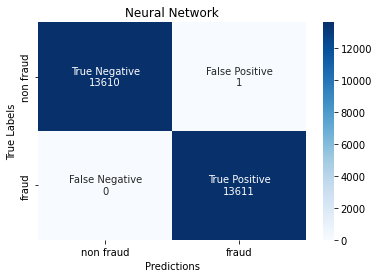

In [25]:
def get_confusion_matrix(actual, predicted, title):
    cf = metrics.confusion_matrix(actual, predicted)
    group_names = ['True Negative','False Positive','False Negative','True Positive'] 
    group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()] 

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    s = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues', xticklabels=['non fraud', 'fraud'], yticklabels=['non fraud', 'fraud'])
    s.set(xlabel='Predictions', ylabel='True Labels', title=title)
    return s

get_confusion_matrix(Y_resampled,y_pred,"Neural Network")

In [26]:
y_pred = (final_nn.predict(x_test_combined)>0.5).astype("int32")

112/112 [==============================] - 0s 2ms/step


<AxesSubplot: title={'center': 'Neural Network'}, xlabel='Predictions', ylabel='True Labels'>

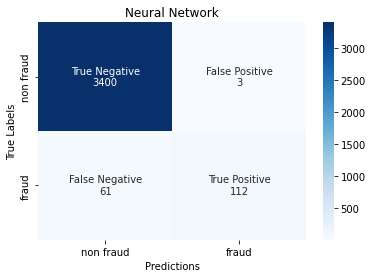

In [27]:
get_confusion_matrix(y_test,y_pred,"Neural Network")

In [28]:
d = {
    'Recall': [metrics.recall_score(y_test,y_pred)],
    'Precision': [metrics.precision_score(y_test,y_pred)],
    'F1-Score': [metrics.f1_score(y_test,y_pred)],
    'Accuracy': [metrics.accuracy_score(y_test,y_pred)],
    'ROC AUC': [metrics.roc_auc_score(y_test,y_pred)],
}

df_metrics = pd.DataFrame(d)
df_metrics

,Recall,Precision,F1-Score,Accuracy,ROC AUC
0,0.647399,0.973913,0.777778,0.982103,0.823259
